In [7]:
import pandas as pd
import os, sys
from egfet.load_data import load_egfet_dataset
# Load the feature importances CSV file
feature_importances_df = pd.read_csv('/home/jalex/Projects/aros/histones/Histones/paper_results_6/2KPEG_Hapt_Train_Mag_Control/run_0/cv_results/top_features.csv')
# Sort the features by importance score in descending order
sorted_features = feature_importances_df.sort_values(by='count', ascending=False)
# Get the top features by importance score
top_features = sorted_features.head(10)  # Change the number 10 to the desired number of top features

# Print the top features
print(top_features)
features_df = pd.read_csv('~/Data/aros/Histones/PavlidisGroup/EGFET Processed Data/downsample_1_magnitude_controlled_exclude_concentrations_0nM_features3.csv')
data = features_df.drop(columns=["Unnamed: 0"])
# first 4 columns are Experiment, Concentration, Trial, Cycle -- rename them
data.columns = ["Experiment", "Concentration", "Trial", "Cycle"] + list(
    data.columns[4:]
)
data = data.set_index(["Experiment", "Concentration", "Trial", "Cycle"])

                                          Unnamed: 0  count
0    Drain Current (nA)__linear_trend__attr_"stderr"    500
1  Drain Current (nA)__energy_ratio_by_chunks__nu...    499
2  Drain Current (nA)__agg_autocorrelation__f_agg...    189
3  Drain Current (nA)__cwt_coefficients__coeff_10...    102
4  Drain Current (nA)__energy_ratio_by_chunks__nu...     92
5                                           0_MFCC_0     65
6                                           0_MFCC_1     34
7  Drain Current (nA)__partial_autocorrelation__l...     16
8                                0_ECDF Percentile_0      3


In [8]:
feature_name_map = {
    "Drain Current (nA)__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6_grad": r"$s$ Binned Quantile Change",
    "0_FFT mean coefficient_27": "FFT Mean Coefficient 27",
    "0_Absolute energy_grad": r"Absolute Energy in $s'$",
    "Drain Current (nA)__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""var""_grad" : r"$I_{DS}$ Linear Trend",
    'Drain Current (nA)__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.6_grad': r"$s'$ Binned Variance Quantile Change",
    'Drain Current (nA)__linear_trend__attr_"stderr"' : r"$s$ Linear Trend Std. Error",
    'Drain Current (nA)__energy_ratio_by_chunks__num_segments_10__segment_focus_1' : r"$s$ Energy Ratio",
    'Drain Current (nA)__agg_autocorrelation__f_agg_"median"__maxlag_40_grad': r"$s'$ Autocorrelation",
}

['Drain Current (nA)__linear_trend__attr_"stderr"', 'Drain Current (nA)__energy_ratio_by_chunks__num_segments_10__segment_focus_1', 'Drain Current (nA)__agg_autocorrelation__f_agg_"median"__maxlag_40_grad']
                                                       Drain Current (nA)__linear_trend__attr_"stderr"  \
Experiment                  Concentration Trial Cycle                                                    
20230526_Hapt_24_H4         100.00        1     34                                            0.001208   
20230518_H4_Rod             0.01          2     27                                            0.001197   
20230519_H2kPEG_H4_NoPolish 100.00        4     0                                             0.001201   
20230525_Hapt_2kPeg_H4      0.01          1     15                                            0.001171   
20230518_H4_2kPEG           1.00          1     18                                            0.001211   

                                                  

/tmp/ipykernel_2911372/3978631407.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features["labels"] = labels
/tmp/ipykernel_2911372/3978631407.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features["labels"] = top_features["labels"].astype(str)


<Figure size 1500x1000 with 0 Axes>

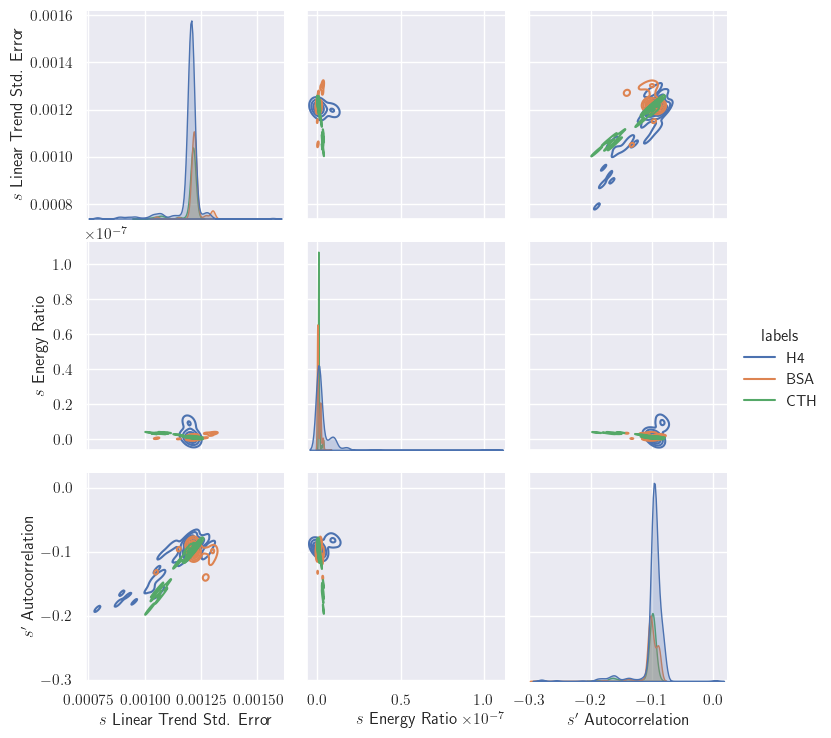

In [9]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from egfet.load_data import get_metadata_labels_groups, get_available_indices

sns.set(rc={'text.usetex' : True})

# Select the top 3 features by name in feature importance df
top_3_features = feature_importances_df.head(3)['Unnamed: 0'].tolist()  # Assuming the 'feature' column contains the feature names
top_features = data[top_3_features]

print(top_3_features)
print(top_features.head())
# Rename the axis labels

custom_labels = [feature_name_map.get(x, x) for x in top_features.columns]
top_features.columns = custom_labels


# get labels
if 'labels' not in locals():
    indices, exclude, labels, groups = get_metadata_labels_groups(
            [
                "Experiment",
                "Concentration",
                "Trial",
            ],
            [],
            top_features.index.unique(),
            verbose=1,
            label_map_override = {
                "20221214_HP_HBS_CTH": 0,  # 0 corresponds to CTH
                "20230518_CTH_2kPEG": 0,
                "20240108_CTH_Hapt_2kPEG_24hr": 0,
                "20230929_1_BSA_Hapt_2kPEG": 2,  # 2 corresponds to BSA
                "20230929_2_BSA_Hapt_2kPEG": 2,
            },
        )

top_features["labels"] = labels
# change labels to strings 0 is Other, 1 is H4
top_features["labels"] = top_features["labels"].astype(str)
# change labels to strings 0 is Other, 1 is H4
top_features["labels"] = top_features["labels"].replace("0", "CTH")
top_features["labels"] = top_features["labels"].replace("1", "H4")
top_features["labels"] = top_features["labels"].replace("2", "BSA")
# Create the pairplot
plt.figure(figsize=(15, 10))
sns.pairplot(data=top_features, hue="labels", kind="kde")

# Show the plot
plt.show()
